In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
## import the data
df= pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
##
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.shape

(891, 12)

In [7]:
df.count()

,0
PassengerId,891
Survived,891
Pclass,891
Name,891
Sex,891
Age,714
SibSp,891
Parch,891
Ticket,891
Fare,891


In [8]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
df.value_counts()

,,,,,,,,,,,,count
PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,1
873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,1
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,1


In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.shape

(891, 12)

In [12]:
## drop irrelevant column such as name , ticket and the column Cabin contain >75% missing value so drop that column

drop_cols = ['Name', 'Ticket', 'Cabin']
df.drop(drop_cols, axis=1, inplace=True)


In [13]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [14]:
df.shape

(891, 9)

<Axes: xlabel='Age', ylabel='Density'>

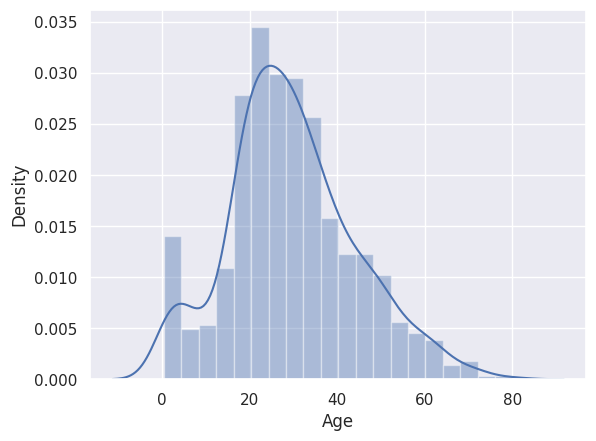

In [15]:
sns.distplot(df['Age'])

In [16]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [17]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [18]:
df.shape

(891, 9)

In [19]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df.shape

(891, 9)

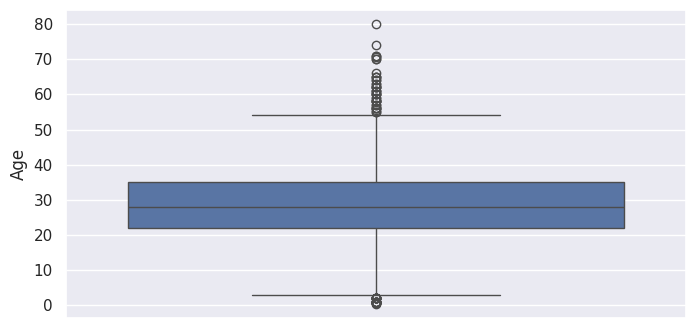

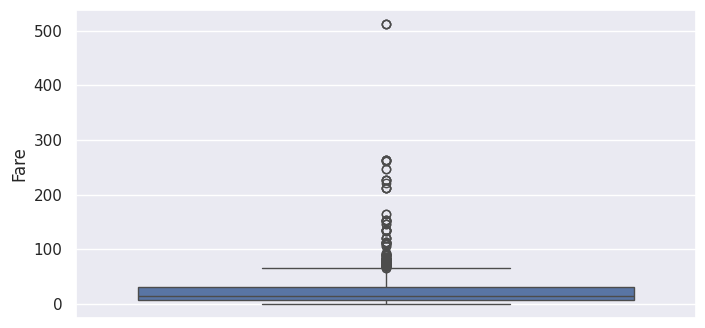

In [20]:
## check for outliers
plt.figure(figsize=(8,4))
sns.boxplot(df['Age'])
plt.show()
plt.figure(figsize=(8,4))
sns.boxplot(df['Fare'])
plt.show()


This is the box plot of column whose name is 'Fare' as it can be seen that one point is outlier so we need to remove it using IQR method



In [ ]:
# print all the columns which are of int or float datatype in df.
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
print(numeric_cols)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [ ]:
l =['Fare']

In [ ]:
df.shape

(891, 9)

In [21]:
## for fare colum
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
low = Q1 - 1.5*IQR
high = Q3 + 1.5*IQR
df = df[(df['Fare']>=low)&(df['Fare']<=high)]

In [22]:
print("high :", high)

high : 65.6344


<Axes: ylabel='Fare'>

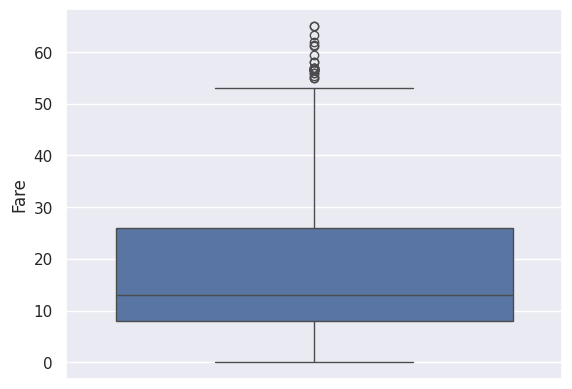

In [23]:
sns.boxplot(df['Fare'])

In [24]:
## for fare colum
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
low = Q1 - 1.5*IQR
high = Q3 + 1.5*IQR
df = df[(df['Age']>=low)&(df['Age']<=high)]

In [25]:
df.shape

(708, 9)

<Axes: ylabel='Age'>

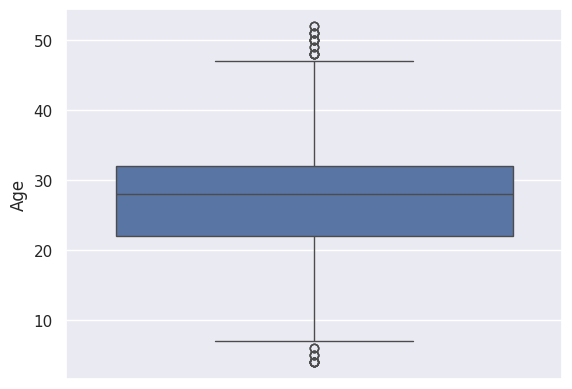

In [27]:
sns.boxplot(df['Age'])

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
df.shape

(708, 9)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,28.0,0,0,8.4583,Q


<Axes: xlabel='Age', ylabel='Density'>

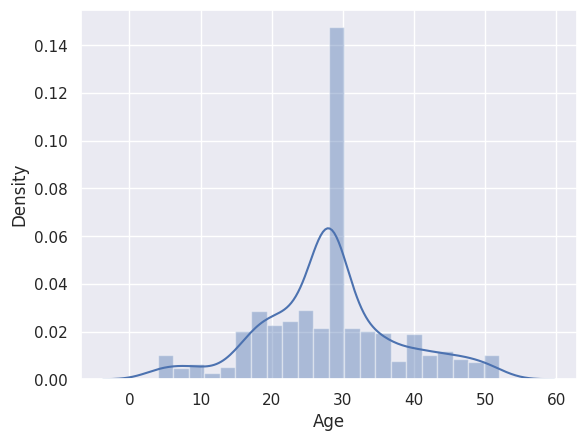

In [ ]:
sns.distplot(df['Age'])

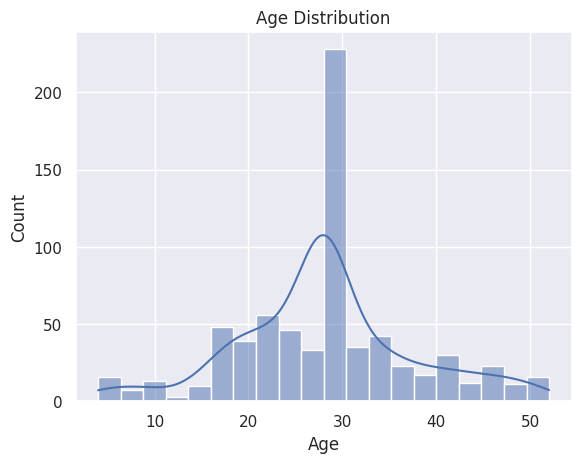

In [ ]:
sns.histplot(df['Age'], bins =20,kde= True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

This plot shows that the most of passenger are of age around 30  and their are no outliers


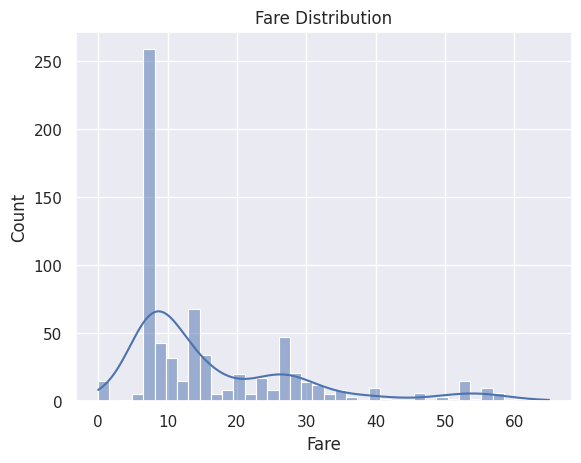

In [ ]:
sns.histplot(df['Fare'], bins =40,kde= True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

In [ ]:
df[['Age','Fare']].describe()

,Age,Fare
count,708.00000,708.000000
mean,28.05226,17.135092
std,9.50620,13.414455
min,4.00000,0.000000
25%,22.00000,7.879200
50%,28.00000,11.241700
75%,32.00000,25.496900
max,52.00000,65.000000


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,28.0,0,0,8.4583,Q


<Axes: xlabel='Sex', ylabel='count'>

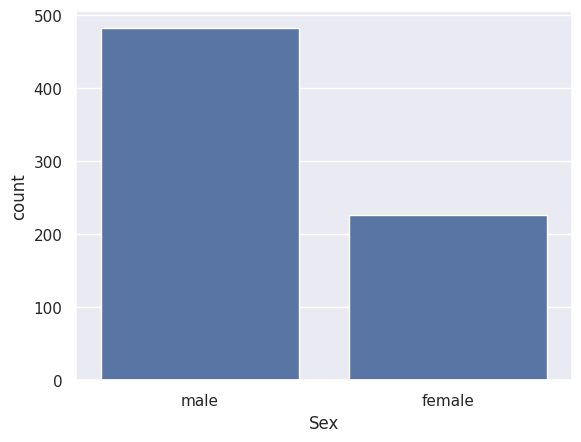

In [ ]:
sns.countplot(x='Sex',data=df)

Number of male passenger are more

<Axes: xlabel='Embarked', ylabel='count'>

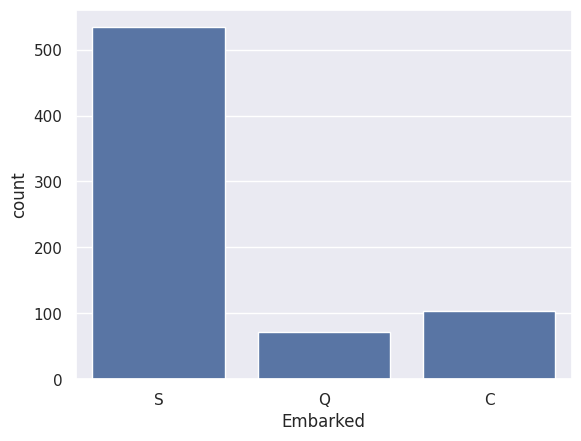

In [ ]:
sns.countplot(x='Embarked',data=df)

Majorty embarkerd from S

<Axes: xlabel='Pclass', ylabel='count'>

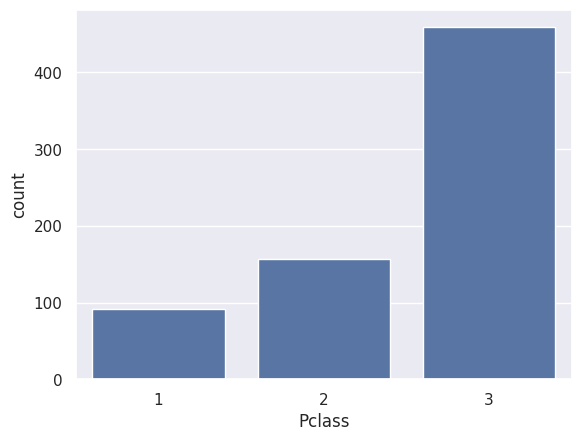

In [ ]:
sns.countplot(x='Pclass' , data=df)

More passenger in 3rd class

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,28.0,0,0,8.4583,Q


<Axes: xlabel='Survived', ylabel='count'>

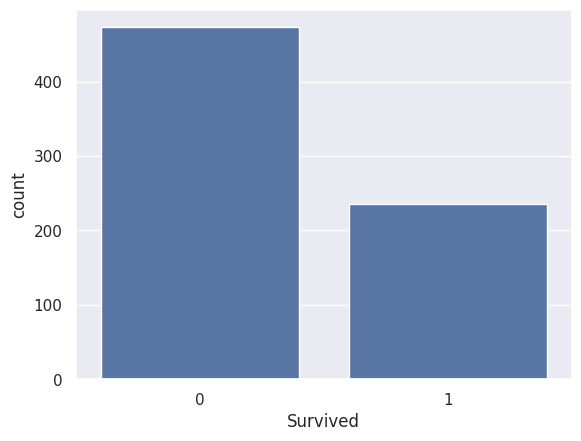

In [ ]:
sns.countplot(x='Survived',data=df)

<Axes: xlabel='SibSp', ylabel='count'>

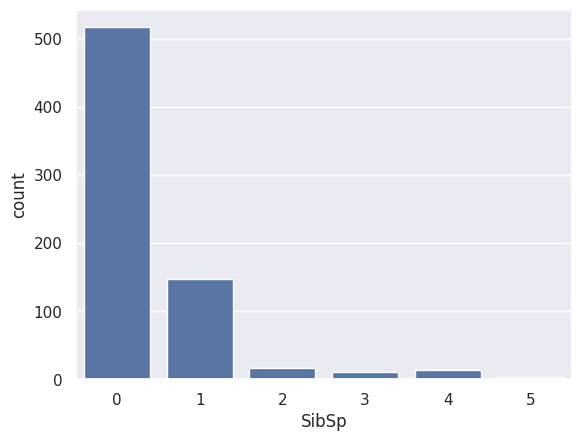

In [ ]:
sns.countplot(x='SibSp',data=df)

Most passenger has 0 family members on abroad. more solo travellers and some familiy are there

<Axes: xlabel='Parch', ylabel='count'>

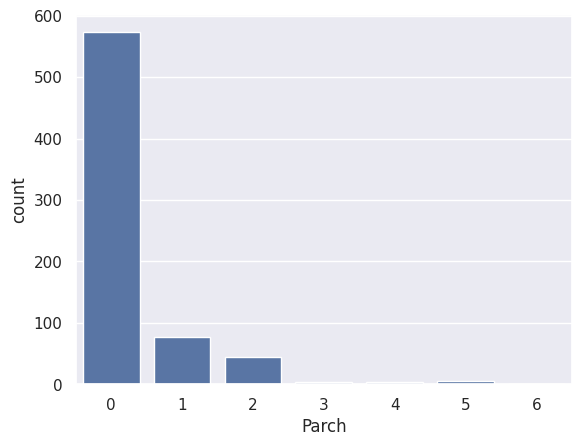

In [ ]:
sns.countplot(x='Parch',data=df)

<Axes: xlabel='Sex', ylabel='count'>

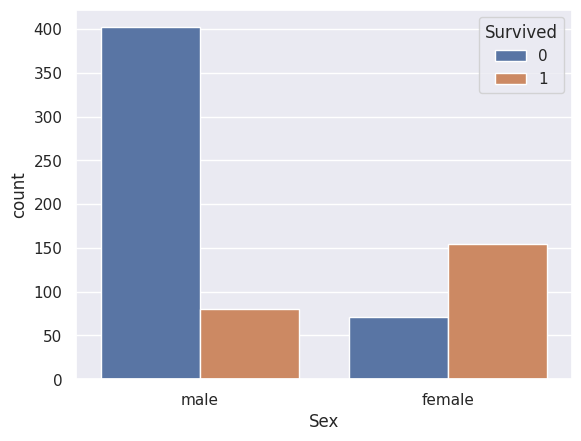

In [ ]:
sns.countplot(x='Sex',hue = 'Survived',data =df)

female have more survived chances

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,28.0,0,0,8.4583,Q


<Axes: xlabel='Pclass', ylabel='count'>

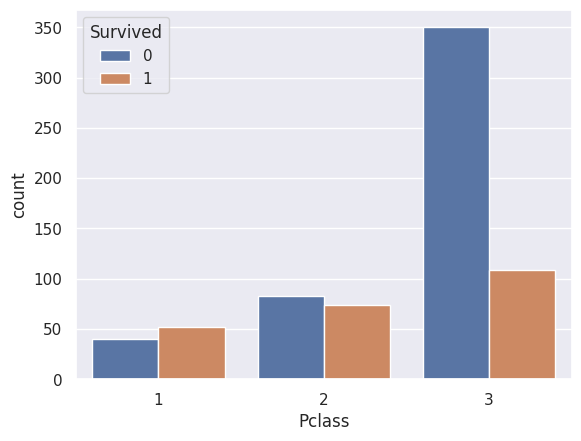

In [ ]:
sns.countplot(x='Pclass',hue = 'Survived',data =df)

3rd class pasanger has more chances for survival

<Axes: xlabel='Embarked', ylabel='count'>

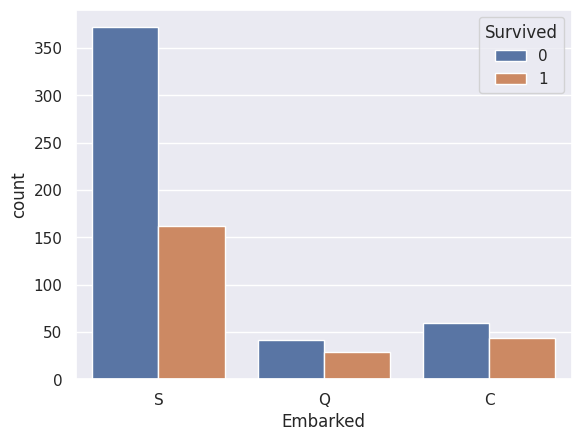

In [ ]:
sns.countplot(x='Embarked',hue = 'Survived',data =df)

<Axes: xlabel='Age', ylabel='Count'>

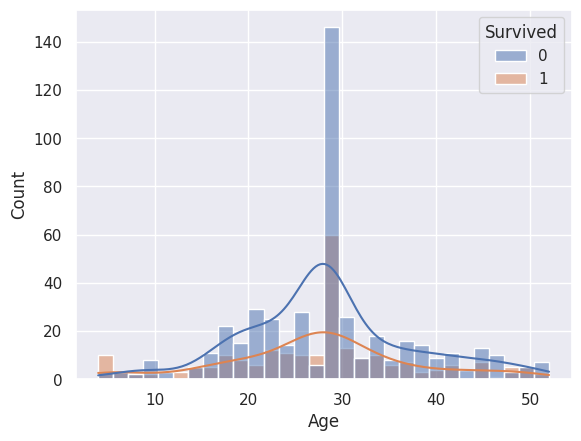

In [ ]:
sns.histplot(data=df, x='Age', hue ='Survived',bins =30 , kde= True)

Text(0.5, 1.0, 'Fare Distribution by Survival')

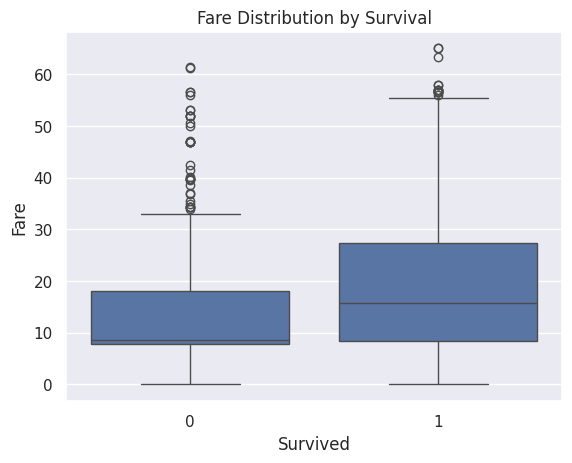

In [ ]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')

In [28]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,708.000000,708.000000,708.000000,708.00000,708.000000,708.000000,708.000000
mean,449.714689,0.331921,2.518362,28.05226,0.399718,0.313559,17.135092
std,260.208426,0.471236,0.714332,9.50620,0.840859,0.782038,13.414455
min,1.000000,0.000000,1.000000,4.00000,0.000000,0.000000,0.000000
25%,219.500000,0.000000,2.000000,22.00000,0.000000,0.000000,7.879200
50%,450.500000,0.000000,3.000000,28.00000,0.000000,0.000000,11.241700
75%,676.250000,1.000000,3.000000,32.00000,1.000000,0.000000,25.496900
max,891.000000,1.000000,3.000000,52.00000,5.000000,6.000000,65.000000


Text(0.5, 1.0, 'Age vs Fare by Survival')

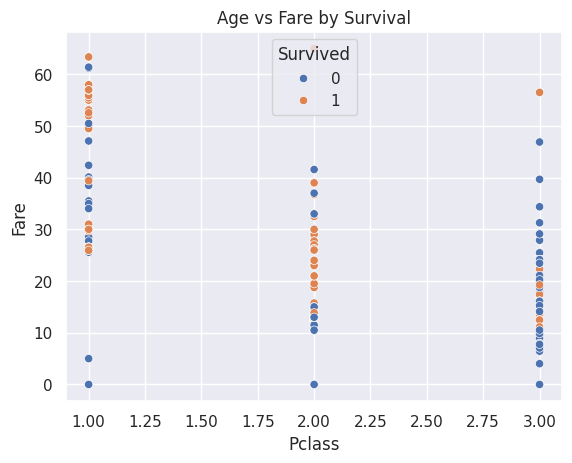

In [29]:
sns.scatterplot(x='Pclass', y='Fare', hue='Survived', data=df)
plt.title('Pclass vs Fare by Survival')

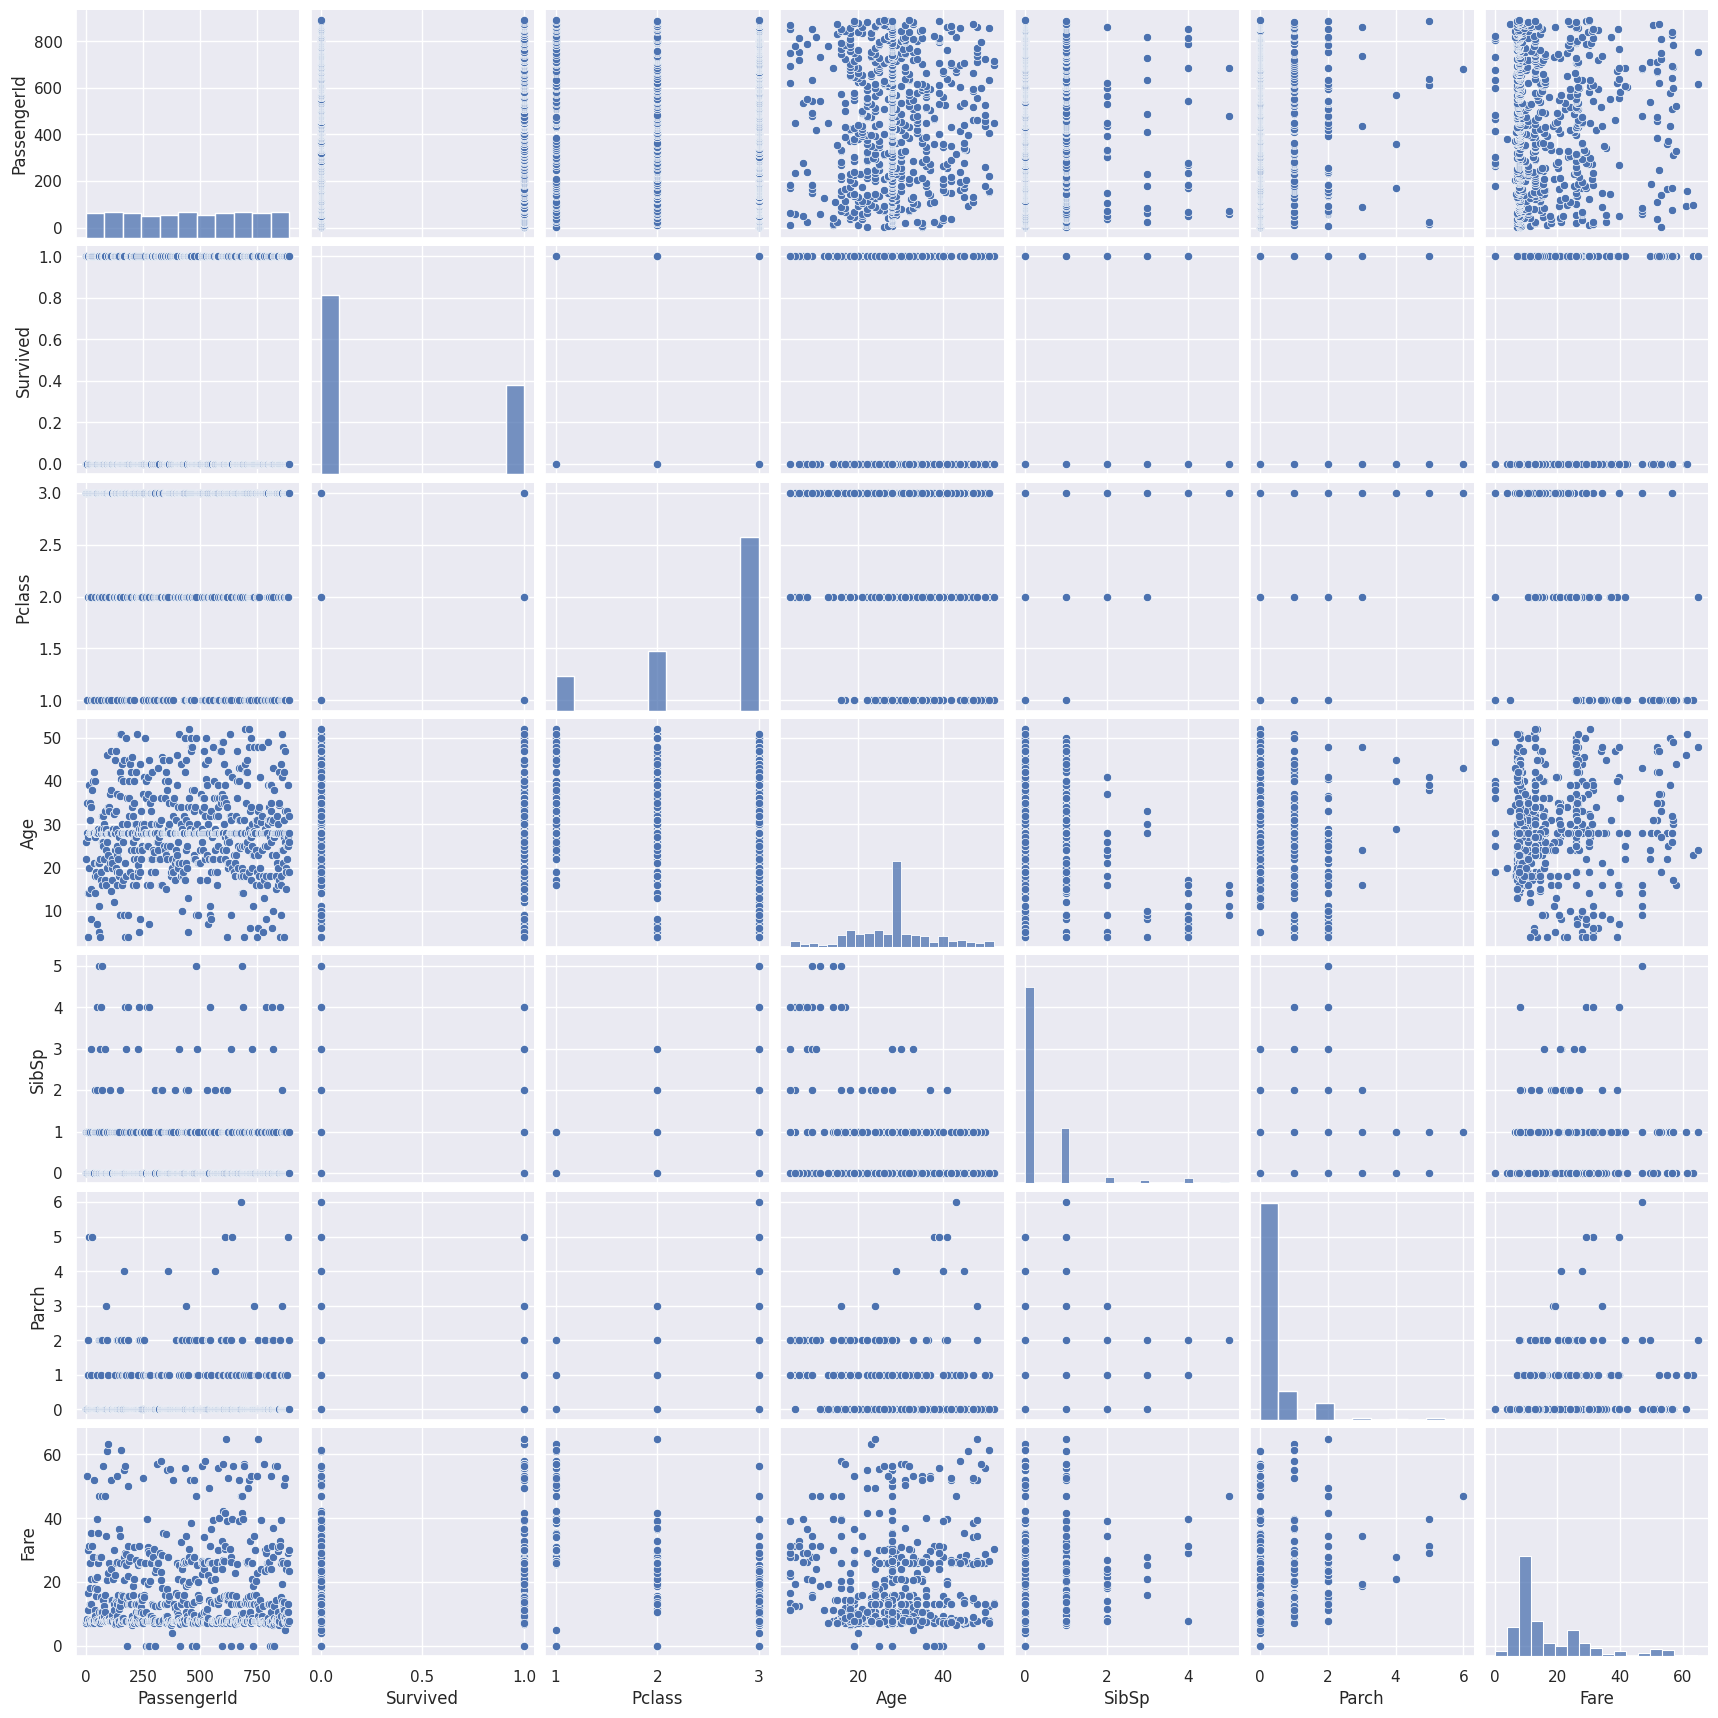

In [ ]:
sns.pairplot(df)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,28.0,0,0,8.4583,Q


Text(0.5, 1.0, 'Age vs Fare by Survival')

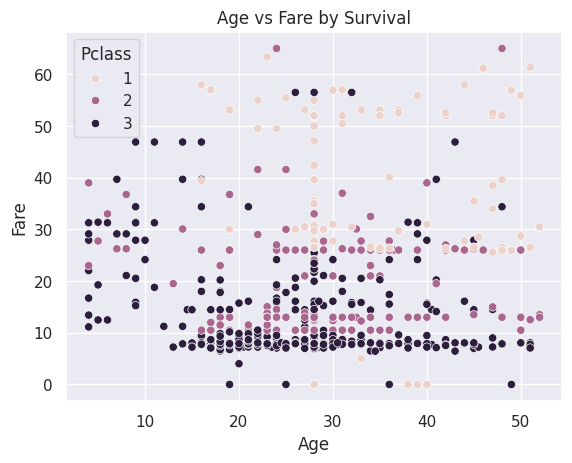

In [ ]:
sns.scatterplot(x='Age', y='Fare', hue='Pclass', data=df)
plt.title('Age vs Fare by Survival')

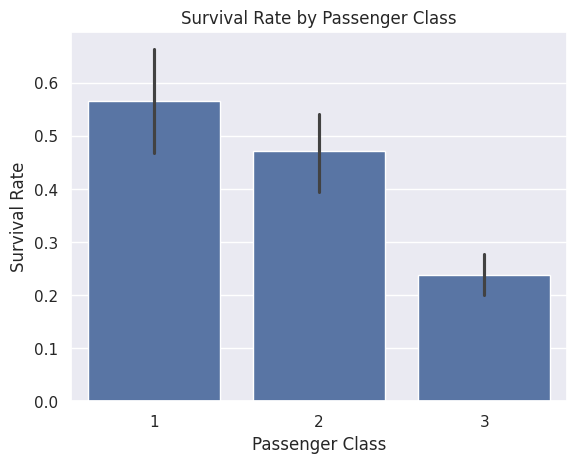

In [ ]:
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

<Axes: >

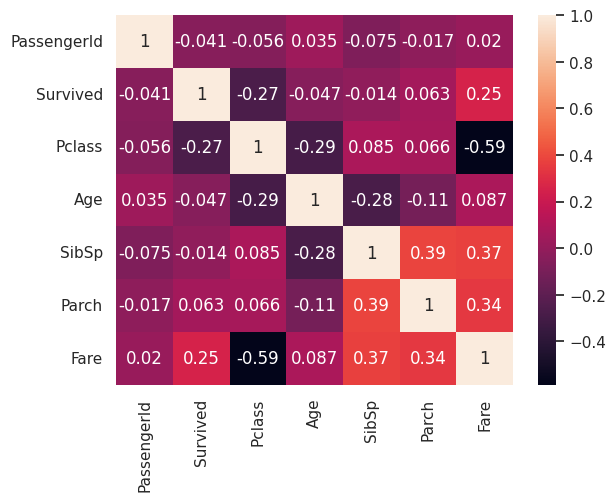

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [ ]:
import pandas as pd

# Step 1: Load your Excel file
# Replace 'orders.xlsx' with your actual file name
file_path = "Orders.csv"
df = pd.read_csv(file_path)

# Step 2: Convert 'Order_Date' from 'day-month-year' to 'year-month-day'
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d-%m-%Y', errors='coerce')

# Step 3: Convert to 'YYYY-MM-DD' string format (optional if you want string type)
df['Order_Date'] = df['Order_Date'].dt.strftime('%Y-%m-%d')

# Step 4: Save the modified DataFrame to a new Excel file
df.to_excel("orders_formatted.xlsx", index=False)

print("Date format conversion complete. File saved as 'orders_formatted.xlsx'")


Date format conversion complete. File saved as 'orders_formatted.xlsx'
